### CUSTOMER CHURN

In [2]:
import pandas as pd
c = pd.read_csv(r"C:\Users\Opsydee\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
c.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
c.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
c.isna().sum().any()

False

In [7]:
c.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [14]:
c.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
c.SeniorCitizen.unique()

array([0, 1], dtype=int64)

In [16]:
c.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [17]:
c.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
c.drop(['customerID'],axis=1, inplace = True)

In [19]:
c.select_dtypes('object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in c.columns:
    if c[i].dtypes == 'object':
        c[i] = encode.fit_transform(c[i])

c.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [27]:
c.gender.dtype == '0'

False

In [28]:
y = c.Churn
x = c.drop(['Churn'],axis =1)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, random_state = 2)

In [33]:
from sklearn.svm import SVC

In [34]:
x_train.shape,y_train.shape

((4930, 19), (4930,))

In [35]:
s = SVC(degree = 5)
s.fit(x_train,y_train)

SVC(degree=5)

In [37]:
y_train.unique()

array([1, 0])

In [42]:
s.score(x_train,y_train)

0.731237322515213

In [43]:
# hyperparameter turing
s = SVC(kernel = 'sigmoid')
s.fit(x_train,y_train)
s.score(x_train,y_train)

0.632657200811359

In [44]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale =sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

In [46]:
x_test_scale

array([[-1.00610382, -0.44372565, -0.96609178, ...,  0.40664998,
        -1.50263093, -0.12868183],
       [ 0.99393321, -0.44372565,  1.03509834, ...,  0.40664998,
         0.66271124, -1.34660713],
       [ 0.99393321, -0.44372565,  1.03509834, ..., -0.52798144,
        -0.05188483, -0.17351667],
       ...,
       [ 0.99393321,  2.25364481, -0.96609178, ..., -1.46261286,
         1.32590945,  0.82814645],
       [ 0.99393321, -0.44372565,  1.03509834, ..., -0.52798144,
         1.06228816,  0.65144443],
       [-1.00610382,  2.25364481, -0.96609178, ...,  1.3412814 ,
        -0.10991468, -1.55812209]])

In [49]:
s =SVC()
s.fit(x_train_scale, y_train)
s.score(x_train_scale, y_train)

0.8253549695740365

In [51]:
S = SVC(kernel ='poly')
s.fit(x_train_scale, y_train)
s.score(x_train_scale, y_train)

0.8253549695740365

In [52]:
s = SVC(kernel = 'linear')
s.fit(x_train_scale, y_train)
s.score(x_train_scale, y_train)

0.8036511156186612

In [53]:
x_test_scale = sc.transform(x_test)

In [54]:
r = pd.Series(s.predict(x_test_scale))

In [60]:
r

0       0
1       0
2       0
3       0
4       0
       ..
2108    0
2109    0
2110    0
2111    0
2112    0
Length: 2113, dtype: int32

In [62]:
y_test

5806    1
3678    0
4060    0
1577    1
5007    0
       ..
6981    0
6616    1
3372    0
4551    0
5437    1
Name: Churn, Length: 2113, dtype: int32

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(r,y_test)

0.7936583057264552

### To save a model

In [68]:
import pickle
from sklearn.ensemble import RandomForestClassifier

#Train your model
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [69]:
# save the model
with open("rfc.pkl","wb") as file:
    pickle.dump(rfc, file)

In [70]:
rfc.score(x_train,y_train)

0.9979716024340771

In [72]:
rfc.fit(x_train_scale,y_train)
rfc.score(x_train_scale,y_train)

0.9979716024340771

In [75]:
rfc.predict(x_test_scale)

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
rfc.predict(x_test)

C:\Users\Opsydee\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [77]:
accuracy_score(rfc.predict(x_test_scale),y_test)

0.7841930903928065

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
confusion_matrix(rfc.predict(x_test_scale),y_test)

array([[1401,  288],
       [ 168,  256]], dtype=int64)

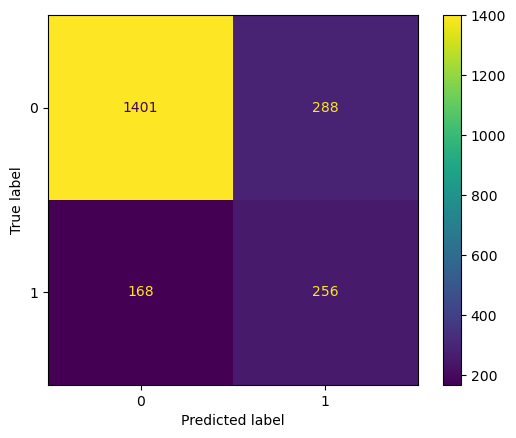

In [83]:
ConfusionMatrixDisplay(confusion_matrix(rfc.predict(x_test_scale),y_test)).plot()

In [89]:
c = pd.read_csv(r"C:\Users\Opsydee\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [90]:
c.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [92]:
c.MultipleLines.value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [93]:
#one-hot encode specified columns
dummy_columns = ['gender','InternetService','PaymentMethod']

In [94]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [96]:
c.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
c

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [103]:
# Identify columns of type "object"
object_columns = c.select_dtypes(include ="object").columns

In [105]:
# specify columns to exclude from label encoding 
exclude_columns =['gender','InternetService','PaymentMethod',"MultipleLines"]

In [107]:
exclude_columns

['gender', 'InternetService', 'PaymentMethod', 'MultipleLines']

In [109]:
label_columns = [col for col in object_columns if col not in exclude_columns]

In [112]:
label_columns

['customerID',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'TotalCharges',
 'Churn']

In [114]:
# label encode remaining categorical columns

label_encoder = LabelEncoder()

for col in label_columns:
    c[col] = label_encoder.fit_transform(c[col])

In [116]:
c.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,0,1,Electronic check,29.85,2505,0
1,3962,Male,0,0,0,34,1,No,DSL,2,...,2,0,0,0,1,0,Mailed check,56.95,1466,0
2,2564,Male,0,0,0,2,1,No,DSL,2,...,0,0,0,0,0,1,Mailed check,53.85,157,1
3,5535,Male,0,0,0,45,0,No phone service,DSL,2,...,2,2,0,0,1,0,Bank transfer (automatic),42.30,1400,0
4,6511,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,0,1,Electronic check,70.70,925,1


In [117]:
c["MultipleLines"] = c["MultipleLines"].map({"No phone service":0,
                                            "No":1,
                                            "Yes":2})

In [120]:
c.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,0,1,Electronic check,29.85,2505,0
1,3962,Male,0,0,0,34,1,1,DSL,2,...,2,0,0,0,1,0,Mailed check,56.95,1466,0
2,2564,Male,0,0,0,2,1,1,DSL,2,...,0,0,0,0,0,1,Mailed check,53.85,157,1
3,5535,Male,0,0,0,45,0,0,DSL,2,...,2,2,0,0,1,0,Bank transfer (automatic),42.30,1400,0
4,6511,Female,0,0,0,2,1,1,Fiber optic,0,...,0,0,0,0,0,1,Electronic check,70.70,925,1


In [121]:
c.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [124]:
c.drop(["customerID"], axis = 1, inplace = True)